<a href="https://colab.research.google.com/github/Nithyasri-kc/Prodigy_TASK01/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
feadata = pd.read_csv('/content/drive/MyDrive/data/train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Selecting the relevant feature.

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
import pandas as pd

In [ ]:
new_data_train = pd.DataFrame()
new_data_train = pd.concat([data["1stFlrSF"],data["2ndFlrSF"],data["BedroomAbvGr"],data["FullBath"],data["SalePrice"]],axis=1)
from sklearn.decomposition import PCA
PCA_columns = ['LotArea','YearBuilt','GarageArea']
pca = PCA(n_components=2)
dimen_reduced_columns = pca.fit_transform(data[PCA_columns])
data_pca_train = pd.DataFrame(dimen_reduced_columns)
new_data_train = pd.concat([data_pca_train,new_data_train],axis=1)
new_data_train.rename({'0':'PCA_1','1':'PCA_2'},inplace=True)
new_data_train.columns = new_data_train.columns.astype(str)

In [ ]:
new_data_train.head()

,0,1,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,SalePrice
0,-2066.521236,85.046440,856,854,3,2,208500
1,-916.871207,-9.075699,1262,0,3,2,181500
2,733.689712,133.949266,920,866,3,2,223500
3,-966.169850,168.362950,961,756,3,1,140000
4,3744.548626,349.692890,1145,1053,4,2,250000


In [ ]:
Xtrain = new_data_train.drop(["SalePrice"],axis=1)
Ytrain = new_data_train["SalePrice"]
X_train,X_test,Y_train,Y_test = train_test_split(Xtrain,Ytrain,test_size=0.2,random_state = 123)

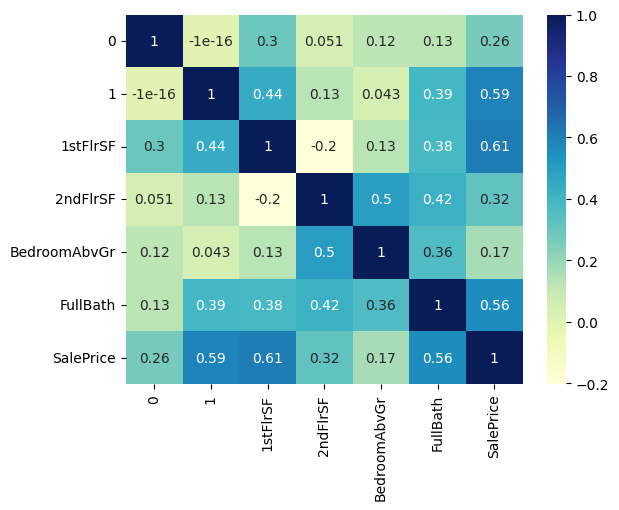

In [ ]:
dataplot = sns.heatmap(new_data_train.corr(), cmap="YlGnBu", annot=True)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Testing the model

In [ ]:
pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(pred,Y_test)

In [ ]:
print(mse)

1731817516.395726


In [ ]:
r2 = r2_score(pred,Y_test)
r2

0.507554998197439